In [1]:
#necessary libraries 

import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from scipy import stats
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind

After getting all the necessary data with Spotify API, framing and labelling ('Spotify API.ipynb' notebook), we can import csv file 

In [2]:
#import dataset created in other jupyter notebook
data = pd.read_csv('my_data.csv')

In [3]:
#check the file: id, title, atist, features, labels (dependent variable)
data

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
0,0TLAptKgYxe7F0KewWH6X6,I Need A Forest Fire,Bon Iver,0.293,0.290,2,-11.596,1,0.69600,0.875000,0.1000,0.0373,128.276,257220,4,1
1,2y0rHDTckWQ7of6tI1yc82,Naked Life,Oko Ebombo,0.624,0.321,0,-9.776,1,0.46300,0.056000,0.1030,0.3040,73.996,255030,4,1
2,5nVE45ithgyVocZp5XLAk6,The Bug Collector,Haley Heynderickx,0.538,0.419,10,-9.705,1,0.77700,0.329000,0.0967,0.5290,99.622,228460,4,1
3,66VuLX5s1nrZzzQqJqPbri,Simply Are,Arto Lindsay,0.682,0.694,7,-11.393,0,0.28900,0.714000,0.0961,0.9540,173.851,224107,4,1
4,0X61Ud5Uzv44RvY3s1SsuO,Imogen,Nick Mulvey,0.493,0.584,5,-6.894,1,0.85000,0.000353,0.1140,0.2340,86.909,255533,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,3485UyMhs2ZF50l9sIZEys,FINAIS,benji price,0.750,0.615,11,-7.532,0,0.64200,0.000000,0.2380,0.8330,75.986,207749,4,0
2641,7szuecWAPwGoV1e5vGu8tl,In Your Eyes,The Weeknd,0.667,0.719,7,-5.371,0,0.00285,0.000081,0.0736,0.7170,100.021,237520,4,0
2642,4Ty4XfOHdUFIXmVtBIFMIG,XPIDI,benji price,0.840,0.475,5,-6.665,0,0.64100,0.000000,0.0983,0.8820,77.006,172064,4,0
2643,1xQ6trAsedVPCdbtDAmk0c,Savage Love (Laxed - Siren Beat),Jason Derulo,0.767,0.481,0,-8.520,0,0.23400,0.000000,0.2690,0.7610,150.076,171375,4,0


In [4]:
data =  data.dropna()

In [5]:
data['Like'].unique()

array([1, 0])

In [6]:
data.columns

Index(['id', 'title', 'main_artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'Like'],
      dtype='object')

##### Split the dataset: Test and Training data

In [7]:
X = data[['danceability', 'energy', 'key','loudness', 'mode', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']]
y = data['Like']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

## First ML algorithms

### Logistic Regression

In [8]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
lr_pred = lr_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, lr_pred))

Accuracy: 0.7670025188916877


### Random Forest 

In [11]:
#Training the Algorithm

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8627204030226701


In [13]:
#Evaluating the Algorithm

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[368  41]
 [ 68 317]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       409
           1       0.89      0.82      0.85       385

    accuracy                           0.86       794
   macro avg       0.86      0.86      0.86       794
weighted avg       0.86      0.86      0.86       794



### Check results

In [14]:
predict_df = X_test
predict_df['prediction'] = y_pred
predict_df['Like'] = data['Like']
predict_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,prediction,Like
2578,0.672,0.7410,11,-6.449,0,0.0803,0.000000,0.1320,0.380,103.018,191253,4,0,0
457,0.512,0.7060,6,-5.244,1,0.0275,0.000049,0.1640,0.703,114.036,167133,4,0,1
670,0.638,0.6680,2,-3.442,1,0.0822,0.000000,0.0815,0.299,113.945,208766,4,0,1
2597,0.776,0.6960,7,-6.533,0,0.3000,0.000003,0.1090,0.578,95.985,198720,4,0,0
92,0.466,0.0528,0,-12.281,1,0.1860,0.168000,0.1600,0.729,140.765,407440,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,0.411,0.4700,9,-6.821,1,0.2840,0.000002,0.0765,0.294,131.734,286172,4,1,1
2012,0.790,0.6940,9,-7.726,0,0.1450,0.002520,0.2810,0.508,103.007,181436,4,0,0
665,0.370,0.5150,2,-9.487,0,0.0233,0.205000,0.0966,0.420,115.732,467320,4,1,1
795,0.262,0.7900,8,-6.942,0,0.4060,0.321000,0.1650,0.493,196.957,437540,4,1,1


In [15]:
predict_df = predict_df.merge(data[['title','main_artist']], left_index=True, right_index=True)

In [16]:
final_prediction = predict_df[['title','main_artist','Like','prediction']]
final_prediction['Check'] = np.where(final_prediction['prediction']==final_prediction['Like'], 'Correct', 'Wrong')
wrong_pred = final_prediction[final_prediction['Check'] == 'Wrong']

wrong_titles = list(wrong_pred['title'])
wrong_pred

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,main_artist,Like,prediction,Check
457,Nem Fé nem Santo,Mallu Magalhães,1,0,Wrong
670,Cigarette Daydreams,Cage The Elephant,1,0,Wrong
2018,Eu Gosto de Ti,ELAS,0,1,Wrong
1047,Conto de Fadas de Sintra a Lisboa,Os Pontos Negros,1,0,Wrong
2290,Love You to Death,Type O Negative,0,1,Wrong
...,...,...,...,...,...
1015,Santamaria,Canova,1,0,Wrong
1992,Unspoken,Aaron Smith,0,1,Wrong
249,Love Again,Daniel Caesar,1,0,Wrong
1376,Taboo,Adso Alejandro,0,1,Wrong


## Exploratory Data Analysis

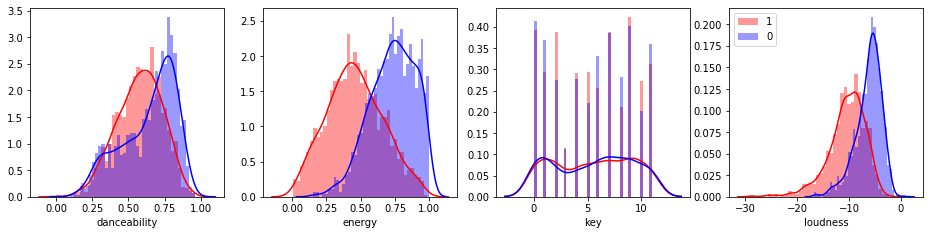

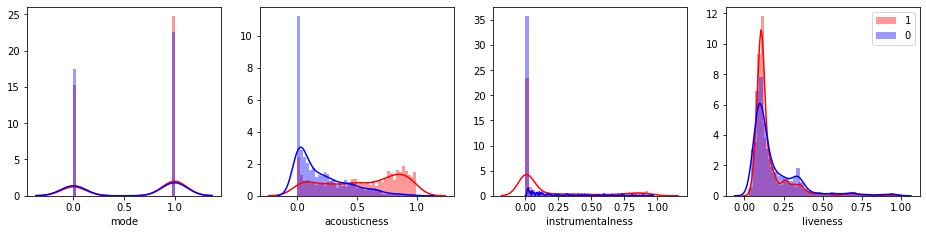

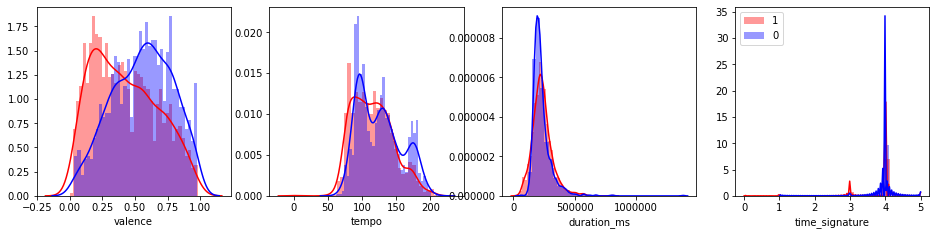

In [17]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(data[data['Like']==1]['danceability'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['danceability'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(data[data['Like']==1]['energy'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['energy'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(data[data['Like']==1]['key'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['key'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(data[data['Like']==1]['loudness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(data[data['Like']==1]['mode'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['mode'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(data[data['Like']==1]['acousticness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['acousticness'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(data[data['Like']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['instrumentalness'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(data[data['Like']==1]['liveness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['liveness'], color='blue', bins=40)
plt.legend((1,0))


plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.distplot(data[data['Like']==1]['valence'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['valence'], color='blue', bins=40)
plt.subplot(4,4,2)
sns.distplot(data[data['Like']==1]['tempo'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['tempo'], color='blue', bins=40)
plt.subplot(4,4,3)
sns.distplot(data[data['Like']==1]['duration_ms'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['duration_ms'], color='blue', bins=40)
plt.subplot(4,4,4)
sns.distplot(data[data['Like']==1]['time_signature'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['time_signature'], color='blue', bins=40)
plt.legend((1,0))

In [18]:
corr = data.corr()
corr

,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
danceability,1.000000,0.062039,0.016643,0.279247,-0.122610,-0.074156,-0.139850,-0.080928,0.523299,-0.069122,-0.389300,0.148891,-0.180245
energy,0.062039,1.000000,0.010035,0.737551,-0.051832,-0.734008,-0.177746,0.180211,0.390527,0.199763,0.023120,0.156666,-0.595209
key,0.016643,0.010035,1.000000,-0.023780,-0.131031,-0.004551,0.022040,-0.012629,0.011916,-0.005217,-0.035193,-0.008799,-0.003121
loudness,0.279247,0.737551,-0.023780,1.000000,-0.074167,-0.545292,-0.374980,0.087556,0.393779,0.138149,-0.104683,0.147276,-0.559831
mode,-0.122610,-0.051832,-0.131031,-0.074167,1.000000,0.061559,-0.010765,0.002164,-0.053309,-0.002407,0.018916,-0.051913,0.056580
acousticness,-0.074156,-0.734008,-0.004551,-0.545292,0.061559,1.000000,0.154207,-0.107108,-0.262904,-0.172892,-0.084527,-0.116281,0.521724
instrumentalness,-0.139850,-0.177746,0.022040,-0.374980,-0.010765,0.154207,1.000000,-0.058640,-0.159249,-0.030166,0.042699,-0.048235,0.319217
liveness,-0.080928,0.180211,-0.012629,0.087556,0.002164,-0.107108,-0.058640,1.000000,0.046407,0.035224,-0.003220,-0.034971,-0.076785
valence,0.523299,0.390527,0.011916,0.393779,-0.053309,-0.262904,-0.159249,0.046407,1.000000,0.111843,-0.295536,0.121524,-0.267845
tempo,-0.069122,0.199763,-0.005217,0.138149,-0.002407,-0.172892,-0.030166,0.035224,0.111843,1.000000,0.031704,0.024543,-0.157498


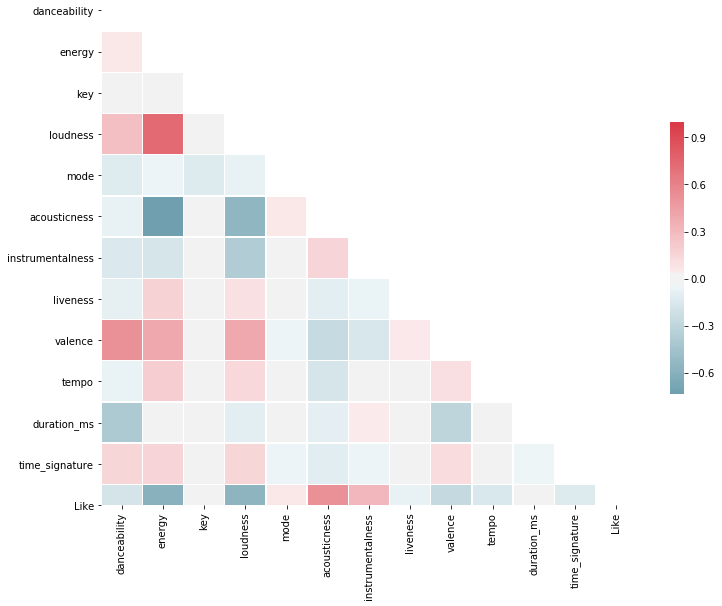

In [19]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

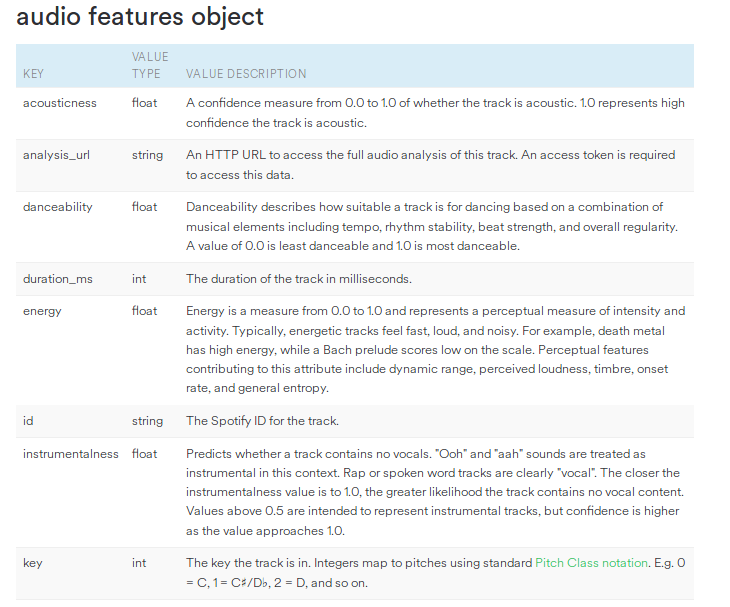

In [20]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo
Image(filename='../images/features.png')

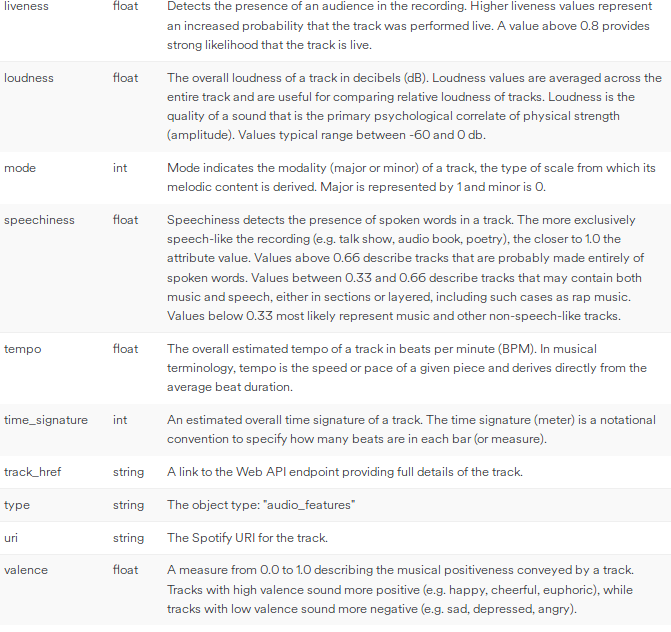

In [21]:
Image(filename='../images/features2.png')

## TEMPO. Simply put, how many beats per minute (BPM) does each song have?

Tempos are also related to different Genres

- Hip Hop	85–95 BPM
- Glitch Hop	105–115 BPM
- Techno	120–125 BPM
- House	& POP 115–130 BPM
- Electro	128 BPM
- Reggaeton >130 BPM
- Dubstep	140 BPM



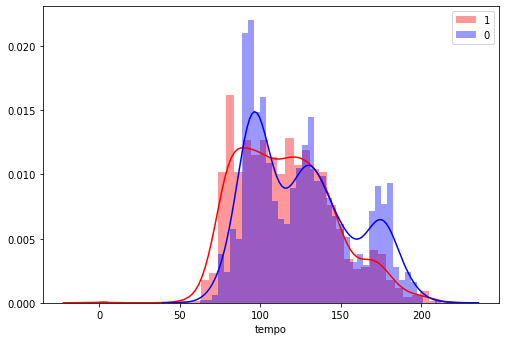

In [22]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['tempo'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['tempo'], color='blue', bins=40)
plt.legend((1,0))

#we see 3 picks for disliked songs:
#one between 90-110 -> prob pop
#125-140 --> sertanejo
#170-290 ---> Anitta, Reggaeton

In [23]:
data[data['Like']==0].sort_values("tempo", ascending = False).head(30)

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
1943,6MNGxu8MprKGkchUchkJsy,Machika,Anitta,0.615,0.833,9,-3.377,1,0.052400,0.000000,0.1710,0.5380,212.117,181733,4,0
2373,4MbJlBkNTEXGJ0sL8U5ABN,Armed To The Teeth,Annihilator,0.362,0.974,1,-4.481,0,0.000044,0.014900,0.2310,0.5210,199.999,266015,4,0
2375,4lRvl2PMPqavdm4Q1qNV0M,New Colossal Hate,Lamb of God,0.383,0.995,2,-3.222,1,0.000011,0.733000,0.3060,0.1490,199.887,270746,3,0
2609,190U8w42yxwiVqY8Tof8Dd,Ela Precisa,David Carreira,0.434,0.653,4,-8.454,0,0.350000,0.000000,0.1150,0.3360,199.879,206053,3,0
1618,4sO6Ixf414qYGlGqMETzMF,Ya Fue,Elias Diaz,0.727,0.893,9,-2.675,0,0.184000,0.000006,0.1020,0.7700,196.005,198367,4,0
1368,6fkfMwMVgFJik4ljNMHGrB,Procura,Juan Miguel,0.628,0.686,7,-7.266,1,0.157000,0.000000,0.3780,0.6670,195.867,221122,4,0
2422,2AjEKcRXkntPkujLXp6hGD,Jinnslammer,Ignea,0.311,0.988,7,-3.397,1,0.000028,0.130000,0.1320,0.2690,195.058,279692,3,0
2157,5t6z9HeNkHWVp0YiXIlSBQ,The Coming Curse,Iced Earth,0.289,0.952,1,-7.740,0,0.000645,0.193000,0.2540,0.0674,195.042,573267,4,0
2119,4GMQOjbWshf4Mzphkjg0DJ,Tornado Of Souls,Megadeth,0.405,0.932,7,-11.151,1,0.002150,0.031700,0.0720,0.4080,194.639,322933,4,0
1937,5UE8e9VTMmv5fjGXLETjCf,Deixa ele sofrer,Anitta,0.682,0.724,8,-4.449,0,0.050800,0.000001,0.0795,0.4220,194.026,171547,4,0


In [24]:
data[data['Like']==1]['tempo'].mean() #Thanks Frank Ocean!! 

115.80208957528971

In [25]:
data[data['Like']==0]['tempo'].mean()

125.51170148148132

## ENERGY. Measure of intensity and activity

- This is the first of Spotify’s more subjective metrics. 

- Energy represents a perceptual measure of intensity and activity. 
- Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.


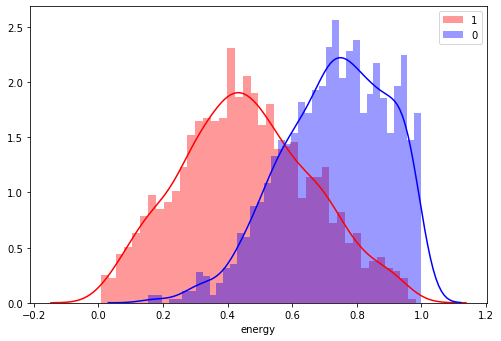

In [26]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['energy'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['energy'], color='blue', bins=40)
plt.legend((1,0))

(array([0, 1]), <a list of 2 Text xticklabel objects>)

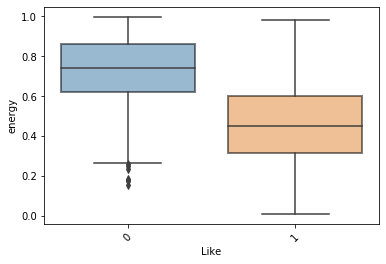

In [27]:
plt.figure(figsize = (6, 4))
ax = sns.boxplot(x='Like', y='energy', data = data)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [28]:
print(data[data['Like']==1]['energy'].mean()) 
print(data[data['Like']==0]['energy'].mean())

x = data[data['Like']==1]['energy']
y = data[data['Like']==0]['energy']

print(stats.ttest_ind(x,y)) #totally reject the H0 

#there are significant differences between the two groups on the ENERGY feature

0.45861010038609984
0.7312437037037048
Ttest_indResult(statistic=-38.079775089009445, pvalue=2.47972930830046e-253)


#### What artists are driving this ENERGY score on my liked songs?

In [29]:
lower_energy = data[data['Like']==1].sort_values("energy").head(30)
lower_energy

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
143,769vrJXv69vVKlZjX9XJ4W,Meet You In The Maze,James Blake,0.325,0.00722,10,-26.397,1,0.966,0.000010,0.1100,0.0650,107.448,295274,4,1
68,4QwzVlAJSkcLeCNQ6Ug30P,The touch of your lips,Chet Baker,0.478,0.00776,10,-24.986,1,0.983,0.780000,0.1050,0.2150,114.270,499533,4,1
568,2rewrH6juNsrGRtkMbNKAe,I work for the Universe,Nick Murphy,0.282,0.01030,2,-25.144,1,0.990,0.909000,0.1910,0.0999,115.202,583804,4,1
556,2TfNMJMvnILjmL8fSYlGAy,Blood And,Nick Murphy,0.273,0.01880,9,-28.400,1,0.989,0.963000,0.0944,0.0766,93.292,255135,4,1
875,59J9tAbY39foKp478aUsWX,"Satisfied Mind - Live at WFMU, East Orange, NJ...",Jeff Buckley,0.403,0.02750,9,-17.715,1,0.932,0.000039,0.1110,0.1360,92.380,357627,3,1
565,0u0IIYFZXtmtKTJilgOI3Z,Tongue (Lift 4),Nick Murphy,0.154,0.02750,1,-18.428,1,0.988,0.000140,0.0939,0.0843,176.324,244603,5,1
557,2uEgyXzyJBr5Iuvqc83d4N,And You Don’t Even Know You Hurt Me,Nick Murphy,0.178,0.02900,5,-25.484,1,0.994,0.931000,0.1010,0.0711,71.676,808503,4,1
127,2ChIDG3Ae88OSrocGzjZzT,Lullaby For My Insomniac,James Blake,0.318,0.02970,10,-16.581,1,0.957,0.001170,0.0969,0.0624,129.706,223800,5,1
132,73Uc6U9BTEFoGP5ywB6MLr,f.o.r.e.v.e.r.,James Blake,0.420,0.03750,10,-17.351,0,0.972,0.000057,0.0975,0.1590,128.997,160512,3,1
19,4IhTXiZLKATmwhMZIb1GQN,Lights Are On,Tom Rosenthal,0.440,0.04000,3,-16.887,1,0.981,0.465000,0.1110,0.2490,135.965,193749,4,1


In [30]:
lower_energy['main_artist'].value_counts().head(10)

#Bon Iver
#Frank Ocean
#James Blake
#Nick Murphy fka Chet Faket
#Tim Bernardes, B Fachada 

James Blake      4
Bon Iver         4
Nick Murphy      4
Tim Bernardes    2
Expedidor        1
B Fachada        1
Tom Rosenthal    1
Kikagaku Moyo    1
alt-J            1
Blake Mills      1
Name: main_artist, dtype: int64

#### Thank's Nick fka Chet Faker

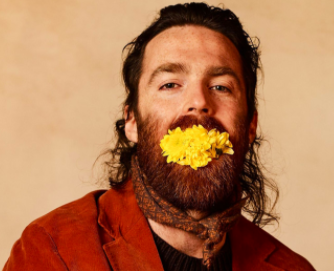

In [31]:
Image(filename='../images/Chet Faker.png')

## DANCEABILITY. 

###### According to the API documentation:
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

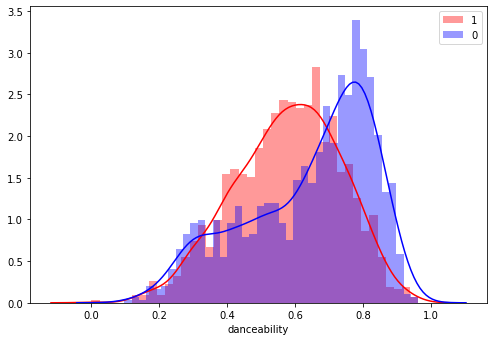

In [32]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['danceability'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['danceability'], color='blue', bins=40)
plt.legend((1,0))

Looks like while my 'disliked' songs follow a skewed distribution torwards higher levels of danceability, my loved songs follow a super normal distribution on this feature showing that I enjoy a wide range of danceability level

#### Songs with lowest danceability 

In [33]:
low_dance = data[data['Like']==1].sort_values(by="danceability").head(50)

In [34]:
low_dance['main_artist'].value_counts().head(10)

Lana Del Rey            7
Nick Murphy             4
Ben Howard              3
James Blake             3
Tash Sultana            3
B Fachada               2
Daniel Caesar           2
Frank Ocean             2
Frank Sinatra           1
Rainer Scheurenbrand    1
Name: main_artist, dtype: int64

##### The fault's on this beautiful album..... guess LDR doesn't wanna dance w/ me

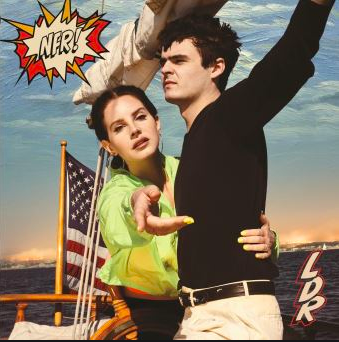

In [35]:
Image(filename='../images/LDR.png')

Spotify doesn’t give any further details as to the exact calculation behind ‘danceability’, but we can find a clue in comparing the two features

### ENERGY vs DANCEABILITY

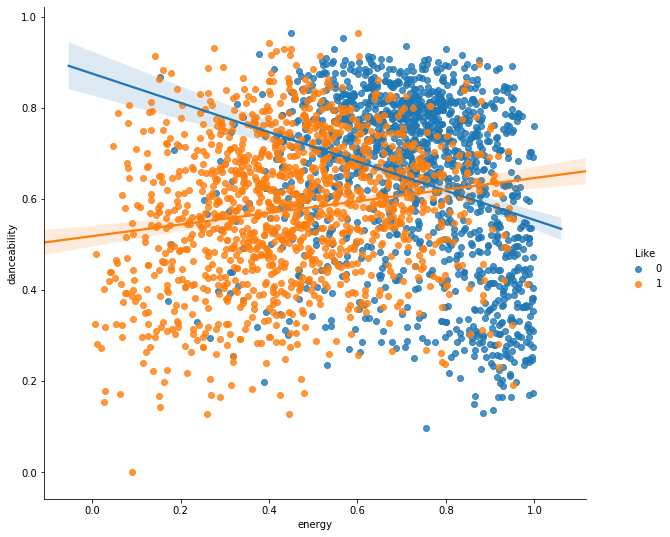

In [36]:
sns.lmplot(x="energy", y="danceability", data=data, hue='Like').fig.set_size_inches(10,8)

#from the graph below we can see that I do enjoy songs with normal level of dancability but low energy
#the imagine shows two very distinct clusters 

#### What is driving a High danceability but low Energy?

In [37]:
high_dance_lower_energy = data[data['Like']==1].sort_values(by="danceability", ascending=False).head(20)
high_dance_lower_energy

#Indie, lo-fi music

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like
1198,6iHgkGwqtr5f4A6qMk0zdC,Tango In Harlem,Touch & Go,0.963,0.602,6,-14.037,1,0.2640,0.382000,0.0885,0.765,131.080,205600,4,1
1102,0U1Bu9wLRAuNL00uYwubGp,Tranquilo,Thalma Freitas,0.941,0.400,10,-10.977,1,0.7730,0.021500,0.0800,0.878,120.715,259707,4,1
42,3p5cvrXVxBN2ety8OB4luc,JOAQUIM,S. PEDRO,0.931,0.276,9,-13.045,1,0.4430,0.168000,0.0969,0.473,119.902,183133,3,1
1219,0SwAOdc4C2kWUMbsXG4ztz,Most Really Pretty Girls Have Pretty Ugly Feet,HNNY,0.929,0.449,1,-10.425,1,0.0862,0.490000,0.0889,0.612,119.896,285440,4,1
1167,1g89nNWU8XIjUQwc8BNVTD,Am I a Girl? Am I a Boy? Do I Really Care?,In Love With a Ghost,0.928,0.433,0,-12.604,1,0.5430,0.323000,0.0904,0.757,104.981,59481,4,1
1004,0lI4NU85a2bxlPVfzjOuTc,Song For You,Marbert Rocel,0.924,0.415,8,-13.764,1,0.1240,0.171000,0.0905,0.761,123.027,383840,4,1
1184,1eov6ZGStBvgaHBJvpMCsp,Caprichoso,V.Vizio,0.916,0.404,1,-10.326,1,0.4630,0.000000,0.1100,0.882,127.004,184274,4,1
1254,5jS8H3e5ehSHgEfAYoxF2s,Choses Qui Se Passent,matt.i,0.915,0.448,6,-7.182,0,0.1720,0.558000,0.1100,0.394,95.009,358679,4,1
332,1fGf3wl2mFYauz09H7TSQr,The Brazil I Want,O F F,0.914,0.515,1,-11.138,1,0.1990,0.866000,0.1030,0.918,129.884,110769,4,1
467,4L7jMAP8UcIe309yQmkdcO,Lost,Frank Ocean,0.913,0.603,8,-4.892,1,0.0272,0.000503,0.1670,0.497,123.061,234093,4,1


## MODE. MAJOR OR MINOR

- Indicates the modality (major or minor) of a track.

- The type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.


In [38]:
data.loc[data['mode']==1, :]['Like'].value_counts()

1    803
0    762
Name: Like, dtype: int64

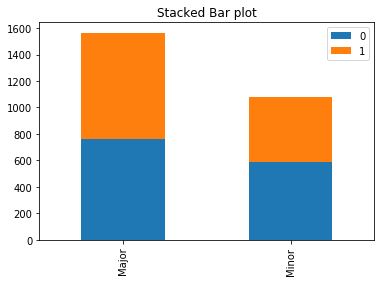

In [39]:
major = data.loc[data['mode']==1, :]['Like'].value_counts()
minor = data.loc[data['mode']==0, :]['Like'].value_counts()

df_plot  = pd.DataFrame([major,minor])
df_plot.index=['Major','Minor']

# Plot
df_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot');

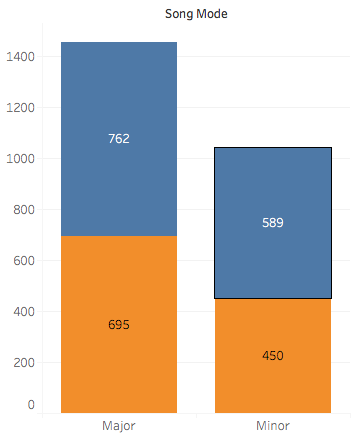

In [40]:
#no shame graph from Tableau
Image(filename='../images/graph_mode.png')

## KEY.

- The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . 
- E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

In [41]:
#count how many songs have non detected key

data[data['key'] ==-1]

#all songs have identified key! that's cool

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like


##### Note one thing from the key description above: "0 = C, 1 = C♯/D♭, 2 = D" 

In [42]:
data.loc[data['key'] == 0, 'key_object'] = 'C'
data.loc[data['key'] == 1, 'key_object'] = 'C♯'
data.loc[data['key'] == 2, 'key_object'] = 'D'
data.loc[data['key'] == 3, 'key_object'] = 'D♯'
data.loc[data['key'] == 4, 'key_object'] = 'E'#Remember that E and B don't have#
data.loc[data['key'] == 5, 'key_object'] = 'F'
data.loc[data['key'] == 6, 'key_object'] = 'F♯'
data.loc[data['key'] == 7, 'key_object'] = 'G'
data.loc[data['key'] == 8, 'key_object'] = 'G♯'
data.loc[data['key'] == 9, 'key_object'] = 'A'
data.loc[data['key'] == 10, 'key_object'] = 'A♯'
data.loc[data['key'] == 11, 'key_object'] = 'B'


In [43]:
data.head()

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like,key_object
0,0TLAptKgYxe7F0KewWH6X6,I Need A Forest Fire,Bon Iver,0.293,0.290,2,-11.596,1,0.696,0.875000,0.1000,0.0373,128.276,257220,4,1,D
1,2y0rHDTckWQ7of6tI1yc82,Naked Life,Oko Ebombo,0.624,0.321,0,-9.776,1,0.463,0.056000,0.1030,0.3040,73.996,255030,4,1,C
2,5nVE45ithgyVocZp5XLAk6,The Bug Collector,Haley Heynderickx,0.538,0.419,10,-9.705,1,0.777,0.329000,0.0967,0.5290,99.622,228460,4,1,A♯
3,66VuLX5s1nrZzzQqJqPbri,Simply Are,Arto Lindsay,0.682,0.694,7,-11.393,0,0.289,0.714000,0.0961,0.9540,173.851,224107,4,1,G
4,0X61Ud5Uzv44RvY3s1SsuO,Imogen,Nick Mulvey,0.493,0.584,5,-6.894,1,0.850,0.000353,0.1140,0.2340,86.909,255533,4,1,F


In [44]:
data['key_object'].unique()

array(['D', 'C', 'A♯', 'G', 'F', 'C♯', 'D♯', 'G♯', 'F♯', 'B', 'A', 'E'],
      dtype=object)

In [45]:
#export to use in tableau dashboard
data.to_csv (r'my_data2.csv', index = False, header=True)

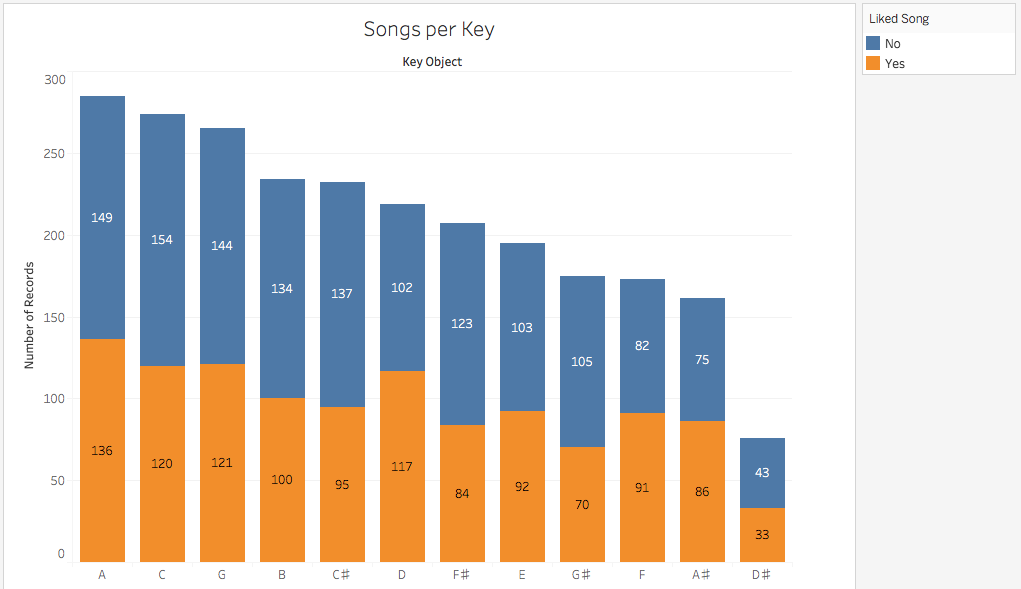

In [46]:
#graph from Tableau
Image(filename='../images/graph_keys.png')

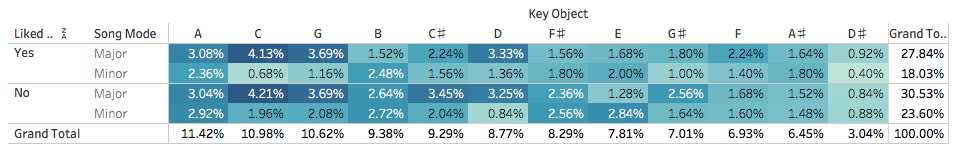

In [47]:
#graph from tableau: with MODE
Image(filename='../images/graph_keys2.png')

- We see that disliked songs have the highest share of Minor key sounds (at 24%). 
- Meanwhile, C major, C# major, and G and D major are especially common keys across both playlists.
- One interesting point is less of F# (major and minor) and E minor in my liked songs vs disliked

## ACOUSTICNESS.

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
- 1.0 represents high confidence the track is acoustic. 

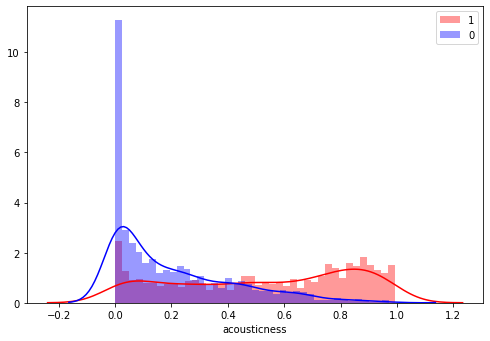

In [48]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['acousticness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['acousticness'], color='blue', bins=40)
plt.legend((1,0))

#there are a lot of disliked songs with 0 acousticness

## VALENCE.

This is one of the most interesting metrics that Spotify produces: A measure describing the musical positiveness conveyed by a track. 
- Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric)
- tracks with low valence sound more negative (e.g. sad, depressed, angry).

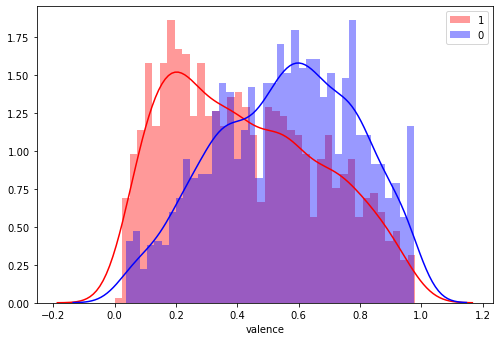

In [49]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['valence'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['valence'], color='blue', bins=40)
plt.legend((1,0))

#I was ecpecting this.... thanks LDR again

#### Let's check what's driving this result

In [50]:
sad = data[data['Like']==1].sort_values(by="valence").head(50)

In [51]:
sad['main_artist'].value_counts().head(10) #I was ecpecting this.... thanks LDR again

James Blake     5
Ben Howard      5
Lana Del Rey    5
Bon Iver        3
alt-J           2
B Fachada       2
Yiuliusly       1
Tom Veloso      1
Márcia          1
Mustard         1
Name: main_artist, dtype: int64

### Valence vs Danceability

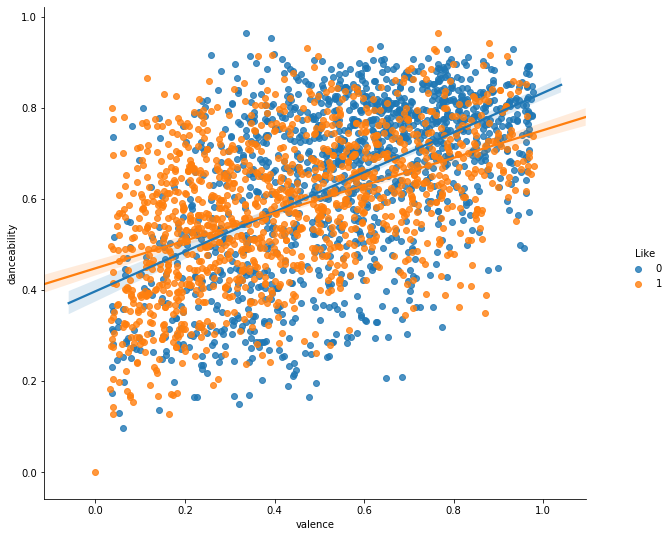

In [52]:
sns.lmplot(x="valence", y="danceability", data=data, hue='Like').fig.set_size_inches(10,8)

#hard to check a cluster from disliked to liked songs 
#but we an see relationship between valence and danceability: the happier the song the better to dance 

In [53]:
data.head()

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like,key_object
0,0TLAptKgYxe7F0KewWH6X6,I Need A Forest Fire,Bon Iver,0.293,0.290,2,-11.596,1,0.696,0.875000,0.1000,0.0373,128.276,257220,4,1,D
1,2y0rHDTckWQ7of6tI1yc82,Naked Life,Oko Ebombo,0.624,0.321,0,-9.776,1,0.463,0.056000,0.1030,0.3040,73.996,255030,4,1,C
2,5nVE45ithgyVocZp5XLAk6,The Bug Collector,Haley Heynderickx,0.538,0.419,10,-9.705,1,0.777,0.329000,0.0967,0.5290,99.622,228460,4,1,A♯
3,66VuLX5s1nrZzzQqJqPbri,Simply Are,Arto Lindsay,0.682,0.694,7,-11.393,0,0.289,0.714000,0.0961,0.9540,173.851,224107,4,1,G
4,0X61Ud5Uzv44RvY3s1SsuO,Imogen,Nick Mulvey,0.493,0.584,5,-6.894,1,0.850,0.000353,0.1140,0.2340,86.909,255533,4,1,F


## LOUDNESS.The overall loudness of a track in decibels (dB). 

Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.


#### Fyi. Did you know? Spotify adjusts loudness.

When Spotify receives the audio file, they transcode it to delivery formats Ogg/Vorbis and AAC. 
At the same time, they calculate the loudness level and store that information as metadata in the transcoded formats of the track.

https://artists.spotify.com/faq/mastering-and-loudness#how-does-spotify-calculate-loudness

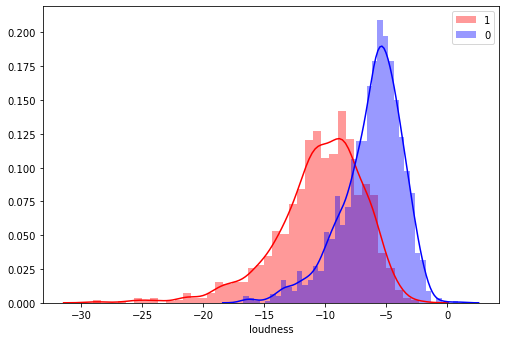

In [54]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['loudness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['loudness'], color='blue', bins=40)
plt.legend((1,0))

#As I was expecting my liked songs distribution is placed on a lower level of loudness vs disliked songs

## INSTRUMENTALNESS.


- Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. - - Rap or spoken word tracks are clearly “vocal”. 
- The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. 
- Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

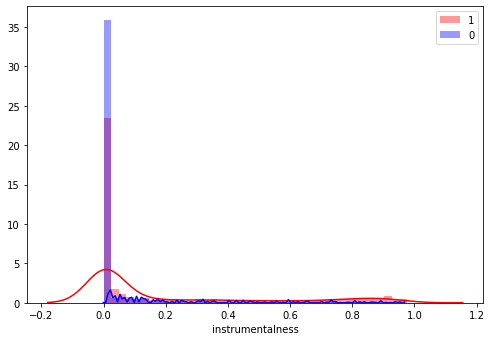

In [55]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['instrumentalness'], color='blue', bins=40)
plt.legend((1,0))


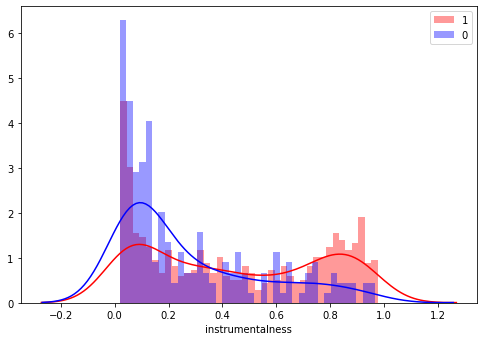

In [56]:
data_test = data[data['instrumentalness']>0.02]

plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data_test[data_test['Like']==1]['instrumentalness'], color='red', bins=40)
sns.distplot(data_test[data_test['Like']==0]['instrumentalness'], color='blue', bins=40)
plt.legend((1,0))



(array([0, 1]), <a list of 2 Text xticklabel objects>)

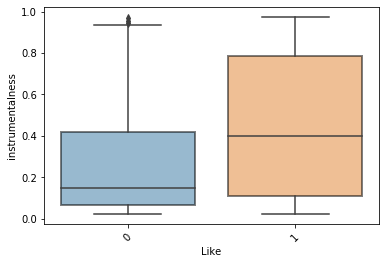

In [57]:
#even using data_test with only songs over 0.02 of instrumentalness level, we can see that my liked songs have 
#a significantly higher level of instruments present in the song, higher likelihood of tracks
#contains no vocal content --> this is also probably due to Lo-Fi songs

plt.figure(figsize = (6, 4))
ax = sns.boxplot(x='Like', y='instrumentalness', data = data_test)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

## LIVENESS. LIVE MUSIC?

- Detects the presence of an audience in the recording. 
- Higher liveness values represent an increased probability that the track was performed live. 
- A value above 0.8 provides strong likelihood that the track is live. 

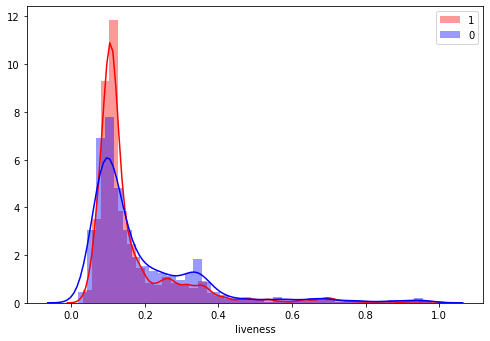

In [58]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.distplot(data[data['Like']==1]['liveness'], color='red', bins=40)
sns.distplot(data[data['Like']==0]['liveness'], color='blue', bins=40)
plt.legend((1,0))

#liked songs more concentrated on not live recorded songs

### One Song: 3 different versions

In [60]:
data[data['title'] == 'Moon River']

,id,title,main_artist,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Like,key_object
475,41cpvQ2GyGb2BRdIRSsTqK,Moon River,Frank Ocean,0.240,0.1160,0,-13.216,1,0.877,0.000920,0.100,0.0937,77.349,188324,3,1,C
630,1IRRqn75jaZHp7zMT1NGbZ,Moon River,Jacob Collier,0.144,0.1540,10,-12.596,1,0.970,0.028400,0.103,0.0400,85.391,496880,4,1,A♯
1292,2KNMqqNd3sLfeN4ukKduRT,Moon River,Frank Sinatra,0.171,0.0632,0,-20.776,1,0.945,0.000027,0.121,0.1680,81.406,199133,3,1,C


- While Frank (Sinatra)'s version holds the lower energy level is also the one with highest danceability, liveness and valence
- Both Ocean and Sinatra produce the song in C as major while Jacob plays in A#. He also plays in a faster tempo
- 